In [96]:
# Implementando o modelo de neurônio adaline e o seu treino.
!pip install seaborn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import time
import sys
# Definição do modelo de neurônio Adaline e os seus respectivos parâmetros.
def Train_Perceptron(x_inputs : np.ndarray, real_out : np.ndarray, learning_hate : float, tol :float, max_epoch : int, control_var : bool) -> list:
    
    # Pegando as dimensões da matriz de entrada, as linhas são as N entradas do meu modelo, enquanto as colunas são n dados de cada entrada.
    dimentions = list(x_inputs.shape)
    try:
        N_inputs = dimentions[0]
        n_val_inputs = dimentions[1]
    except Exception as error:
        print(f"The error : {error} is happening. \n") 
        print("Probably, it's happening becausa n_val_inputs = 0, so we change it to 1.")
        n_val_inputs = 1
        print(f"Now, n_val_inputs = {n_val_inputs}")

    # Control_var é uma variável de controle para caso seja necessário adicionar 1 threshold.
    if control_var == True:
        # wt é uma matriz com n_val_inputs + 1 linhas representando valores de parametros inicalizados aleatoriamente.
        # Isso acontece porque vamos acrescentar 1 coluna de 1's na matriz de pesos.
        wt = (np.random.uniform(size = n_val_inputs + 1) - 0.5)
        aux = np.column_stack([np.ones_like(x_inputs[: , 1])])
        x_inputs = np.column_stack([-aux, x_inputs])
    else:
        # Caso o sinal de controle seja False, então não terá o threshold e a matriz de pesos continuará intacta.
        wt = (np.random.uniform(size = n_val_inputs) - 0.5)
    

    n_epochs = 0 # Cada iteração de treino sobre o conjunto de dados.
    erro_epoch = tol + 1 # Variável para controlar o loop
    lst_param = np.zeros((max_epoch, len(wt)))
    lst_error_grad = np.zeros((max_epoch))

    while((n_epochs < max_epoch) and (erro_epoch > tol)):
        
        error_grad = 0
        changing_order = np.random.permutation(N_inputs)
        # Irei realizar esse loop enquanto houver dados de entrada, os valores de cada entrada estão aleatórios, para melhorar a performance de treino do modelo.
        for i in range(N_inputs):
            i_aleatorio = changing_order[i] # Escolhi 1 entrada aleatória.
            x_val_al = x_inputs[i_aleatorio,] # Pegando os valores de 1 entrada aleatória.
            wt = wt.reshape(-1, 1)

            y_hat_out = x_val_al @ wt # ŷ = t(X)w, é o transposto de X pois tanto x quanto w estão inicializados como vetores.
            err = real_out[i_aleatorio,] - y_hat_out

            # Utilizando a Regra Delta para a atualização de pesos.
            dw = (learning_hate * err * x_inputs[i_aleatorio, ])
            dw = np.transpose(dw)
            wt = np.add(wt, dw) # w(t + 1) = w(t) + nex
            error_grad = error_grad + (err * err) # Acumulando os erros do gradiente descendente em 1 variável.

        # Para cada epoch, estou adicionando na lista tanto parametros, quanto o erro medio do gradiente.
        #lst_param[n_epochs] = wt
        lst_error_grad[n_epochs] = error_grad / N_inputs
        n_epochs += 1
    # Retornarei 2 listas, sendo cada uma delas contendo cada erro e a outra contendo os parametros.
    arr_return = [lst_error_grad, wt]
    return arr_return

def yperceptron(xvec, w, control_signal):
    if control_signal == 1:
        xvec = np.column_stack([np.ones_like(xvec), xvec])
        u = xvec @ w
        if u >=0 :
            y = 1
        else:
            y = 0
        return np.array([y])

Defaulting to user installation because normal site-packages is not writeable


In [112]:
df = pd.read_csv("Iris.csv")
xc1 = df.iloc[1 : 50, : ]
xc2 = df.iloc[51 : 100, : ]
xc3 = df.iloc[101 : , :]
N_values_train = 30

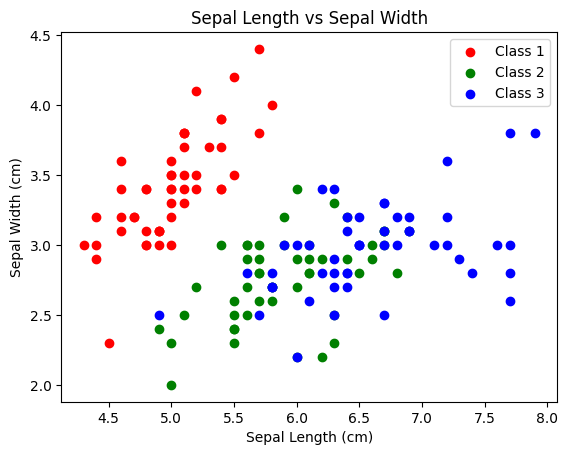

In [114]:
seq1 = np.random.permutation(50)
plt.scatter(xc1['SepalLengthCm'], xc1['SepalWidthCm'], label='Class 1', color = 'red')
plt.scatter(xc2['SepalLengthCm'], xc2['SepalWidthCm'], label='Class 2', color = 'green')
plt.scatter(xc3['SepalLengthCm'], xc3['SepalWidthCm'], label='Class 3', color = 'blue')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.title('Sepal Length vs Sepal Width')
plt.legend()
plt.show()

In [120]:
xc1_train = xc1.iloc[seq1[:N_values_train], ]
yc1_train = np.zeros((N_values_train))

In [121]:
seq2 = np.random.permutation(50)
xc2_train = xc2.iloc[seq2[1:N_values_train]]
yc2_train = np.zeros((N_values_train))

IndexError: positional indexers are out-of-bounds

In [118]:
seq2 = np.random.permutation(50)

xc1_test = xc1.iloc[seq1[N_values_train + 1] : 50, ]
yc1_test = np.zeros((50 - N_values_train))
xc2_test = xc2.iloc[seq2[N_values_train + 1] : 50, ]
yc2_test = np.ones((50 - N_values_train))

In [122]:
xin = np.array([xc1_train, xc2_train])
yd = np.array([yc1_train, yc2_train])
xin_test = np.array([xc1_test, xc2_test])
y_test = np.array([yc1_test, yc2_test])

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (2,) + inhomogeneous part.

In [ ]:
retlist = Train_Perceptron(xin, yd, 0.01, 0.01, 100, 1)
wt = retlist[1]
yt = 